In [339]:
import pandas as pd


In [351]:
data = pd.read_csv('House Price India.csv')

# get random 100 rows and 2 columns Price and living_area_renov and remove index
data = data[['Price', 'living_area_renov']].sample(100).reset_index(drop=True)
# add new column as Price per living_area_renov
data['Price per living_area_renov'] = data['Price']/data['living_area_renov']
print(data['Price per living_area_renov'].mean(), data['Price per living_area_renov'].max(), data['Price per living_area_renov'].min())
data.head()

255.12065168393028 952.8795811518324 65.12345679012346


,Price,living_area_renov,Price per living_area_renov
0,417500,1390,300.359712
1,1080000,3230,334.365325
2,370000,1620,228.395062
3,263000,2150,122.325581
4,335000,1410,237.588652


In [352]:
# add new column as notater for price per living_area_renov if it is above average or below average by 20%
# average is the best and put as "Real Estate Expert", above average as "House Owner", below average as "House Buyer"

average = data['Price per living_area_renov'].mean()
# 20% of average
twenty_percent = average * 0.2
data['Notater'] = data['Price per living_area_renov'].apply(lambda x: 'Real Estate Expert' if x < average + twenty_percent and x > average - twenty_percent else 'House Owner' if x > average + twenty_percent + twenty_percent * 0.765 else 'Other')

In [365]:
# divide price and living_area_renov with 1000
data['Price'] = data['Price']/100
data

,Price,living_area_renov,Price per living_area_renov,Notater
0,4.175,1.39,300.359712,Real Estate Expert
1,10.800,3.23,334.365325,Other
2,3.700,1.62,228.395062,Real Estate Expert
3,2.630,2.15,122.325581,Other
4,3.350,1.41,237.588652,Real Estate Expert
...,...,...,...,...
95,5.250,2.10,250.000000,Real Estate Expert
96,3.270,1.50,218.000000,Real Estate Expert
97,2.950,2.59,113.899614,Other
98,4.350,2.19,198.630137,Other


In [367]:
# save the data to new csv file
data.to_csv('House Price India with Notater.csv', index=False)

In [368]:
data = pd.read_csv('House Price India with Notater.csv')

In [357]:
# data['Price'] = data['Price'].apply(lambda x: 1770000 if x > 1770000 else x)

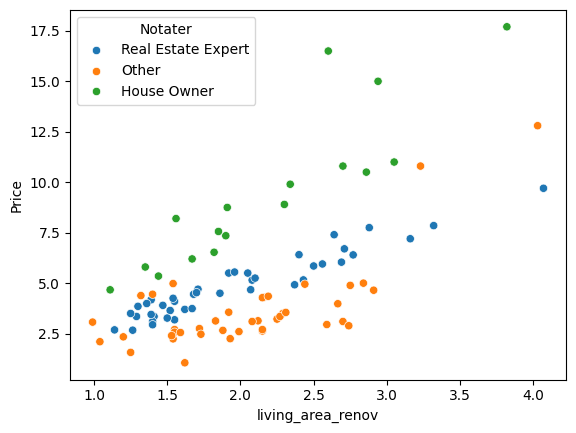

In [366]:
# plot the data color coded by notater
import matplotlib.pyplot as plt
import seaborn as sns

sns.scatterplot(data=data, x='living_area_renov', y='Price', hue='Notater')
plt.show()

In [542]:
import numpy as np



# linear regression model
def linear_regression(x):
    global weight, bias
    return weight * x + bias

# loss function
def loss(y, y_pred):
    return y - y_pred

weight, bias

(0.417022004702574, 0.7203244934421581)

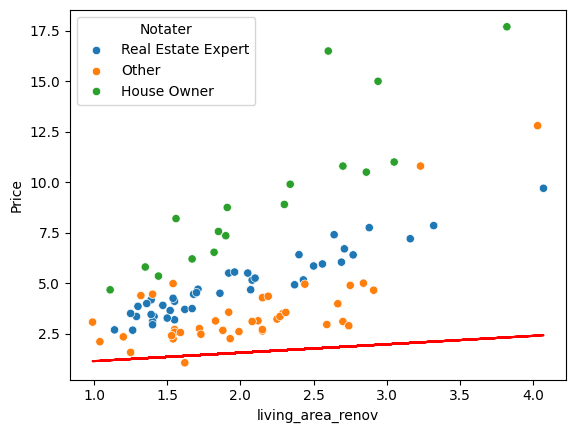

In [543]:
# draw the line with colored dots
plt.plot(data['living_area_renov'], linear_regression(data['living_area_renov']), color='red')
sns.scatterplot(data=data, x='living_area_renov', y='Price', hue='Notater')
plt.show()

In [554]:
weight_and_bias_history = []
current_iteration = 0

# seed
np.random.seed(1)
# random weight and bias
weight = np.random.rand()
bias = np.random.rand()
iterations = 100
# learning rate
lr = 1e-5

# train the model
for i in range(iterations):
    for _, row in data.iterrows():
        x = row['living_area_renov']
        y = row['Price']
        y_pred = linear_regression(x)
        l = loss(y, y_pred)
        weight += lr * l * x
        bias += lr * l

    current_iteration += 1
    if current_iteration % 5 == 0:
        weight_and_bias_history.append(
            {
                'weight': weight,
                'bias': bias,
                'iteration': current_iteration
            }
        )
weight_and_bias_history[-1]

{'weight': 1.0654049985743208, 'bias': 0.9909596660284834, 'iteration': 100}

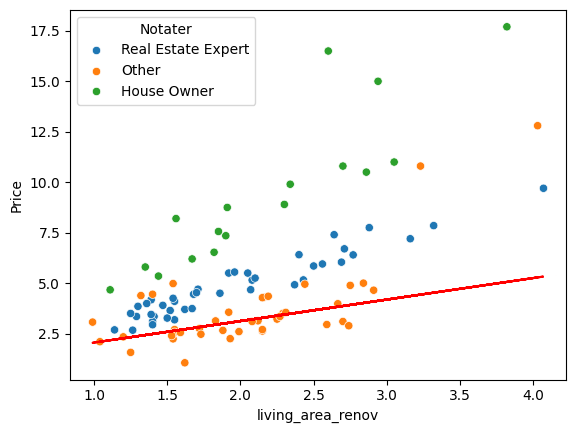

In [555]:
# draw the line with colored dots
plt.plot(data['living_area_renov'], linear_regression(data['living_area_renov']), color='red')
sns.scatterplot(data=data, x='living_area_renov', y='Price', hue='Notater')
plt.show()

In [547]:
# to dataframe
weight_and_bias_history_df = pd.DataFrame(weight_and_bias_history, columns=['weight', 'bias', 'iteration'])
weight_and_bias_history_df

,weight,bias,iteration
0,0.458498,0.737948,5
1,0.498859,0.755066,10
2,0.538133,0.771695,15
3,0.576352,0.787846,20
4,0.613543,0.803533,25
5,0.649734,0.818768,30
6,0.684953,0.833564,35
7,0.719225,0.847933,40
8,0.752578,0.861886,45
9,0.785035,0.875435,50


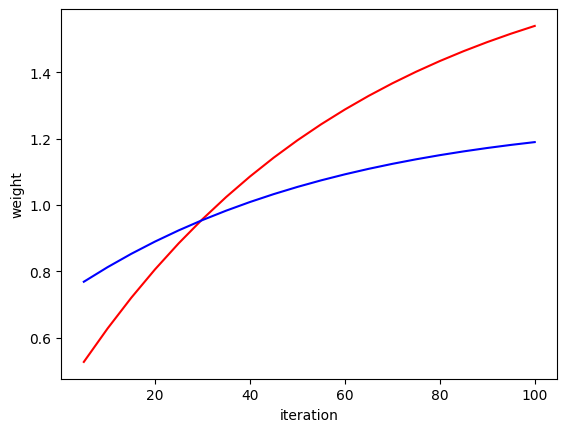

In [556]:
# draw weight and bias history with iteration
sns.lineplot(data=weight_and_bias_history_df, x='iteration', y='weight', color='red')
sns.lineplot(data=weight_and_bias_history_df, x='iteration', y='bias', color='blue')
plt.show()

In [557]:
# save the weight and bias history to csv
weight_and_bias_history_df.to_csv('weight_and_bias_history_without_notator.csv', index=False)

In [558]:
weight_and_bias_history = []
current_iteration = 0
# seed
np.random.seed(1)
# random weight and bias
weight = np.random.rand()
bias = np.random.rand()
print(weight, bias)
# train with notator based learning rate
# learning rate
lr = 1e-5

# train the model
for i in range(iterations):
    for _, row in data.iterrows():
        x = row['living_area_renov']
        y = row['Price']
        y_pred = linear_regression(x)
        l = loss(y, y_pred)
        if row['Notater'] == 'Real Estate Expert':
            weight += lr * l * x * 5
            bias += lr * l * 5
        elif row['Notater'] == 'Other':
            weight += lr * l * x * 2
            bias += lr * l * 2
        else:
            weight += lr * l * x
            bias += lr * l

    current_iteration += 1
    if current_iteration % 5 == 0:
        weight_and_bias_history.append(
            {
                'weight': weight,
                'bias': bias,
                'iteration': current_iteration
            }
        )
weight_and_bias_history[-1]

0.417022004702574 0.7203244934421581


{'weight': 1.5398916441508599, 'bias': 1.1894520787711693, 'iteration': 100}

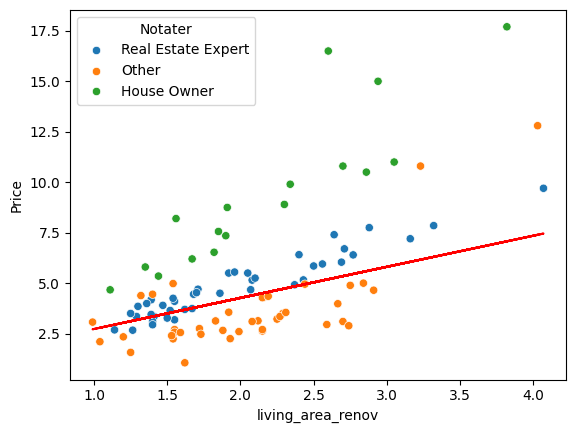

In [559]:
# draw the line with colored dots
plt.plot(data['living_area_renov'], linear_regression(data['living_area_renov']), color='red')
sns.scatterplot(data=data, x='living_area_renov', y='Price', hue='Notater')
plt.show()

In [552]:
# to dataframe
weight_and_bias_history_df = pd.DataFrame(weight_and_bias_history, columns=['weight', 'bias', 'iteration'])
weight_and_bias_history_df

,weight,bias,iteration
0,0.526413,0.768238,5
1,0.627187,0.812191,10
2,0.720029,0.852500,15
3,0.805568,0.889455,20
4,0.884384,0.923320,25
5,0.957011,0.954343,30
6,1.023941,0.982749,35
7,1.085625,1.008746,40
8,1.142481,1.032526,45
9,1.194892,1.054264,50


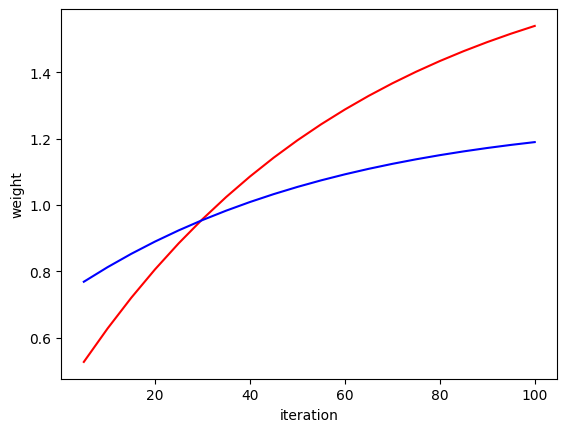

In [553]:
# draw weight and bias history with iteration
sns.lineplot(data=weight_and_bias_history_df, x='iteration', y='weight', color='red')
sns.lineplot(data=weight_and_bias_history_df, x='iteration', y='bias', color='blue')
plt.show()

In [514]:
# save the weight and bias history to csv
weight_and_bias_history_df.to_csv('weight_and_bias_history_with_notator.csv', index=False)